# Simulated Annealing

## Imports

In [66]:
# imports
import matplotlib.pyplot as plt
import math
import sys
import copy
import pandas as pd
import numpy as np
import random

## Functions and Data Structures

In [52]:
# dictionary of 26 items to represent Keyboard, the array below represents the QUERTY keyboard 
# although, I made the keys into a grid instead of maintaining the ratio of a normal keyboard (need to fix)

letters = {'Q':(1, 3), 'W':(2, 3), 'E':(3, 3),
    'R':(4, 3), 'T':(5, 3), 'Y':(6, 3),
    'U':(7, 3), 'I':(8, 3), 'O':(9, 3),
    'P':(10, 3), 'A':(1.5, 2), 'S':(2.5, 2),
    'D':(3.5, 2), 'F':(4.5, 2), 'G':(5.5, 2),
    'H':(6.5, 2), 'J':(7.5, 2), 'K':(8.5, 2),
    'L':(9.5, 2), 'Z':(2, 1), 'X':(3, 1),
    'C':(4, 1), 'V':(5, 1), 'B':(6, 1),
    'N':(7, 1), 'M':(8, 1)}

letters[' ']=(6,0)

lettersList = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(lettersList)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [53]:
file_name = 'Frankenstein.txt'
with open(file_name, 'r', encoding='utf-8') as f:
    file_name_data = f.read()
    file_name_data=file_name_data.upper()

In [54]:
# adding all the possible combinations of two letters into freq dictionary eg.. QW, QE, QR etc.
frequency = {}

state = list(letters)
keys = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
for i in range(len(keys)):
    for j in range(len(keys)):
        frequency[(keys[i] + keys[j])] = 0

# then going through file and counting the frequncy of each keyPair
for i in range(len(file_name_data)-2):
    keypair = file_name_data[i] + file_name_data[i+1]
    if keypair in frequency:
        frequency[keypair] +=1

print(frequency)  

{'AA': 1, 'AB': 655, 'AC': 769, 'AD': 1261, 'AE': 3, 'AF': 252, 'AG': 644, 'AH': 7, 'AI': 964, 'AJ': 8, 'AK': 274, 'AL': 1709, 'AM': 694, 'AN': 5687, 'AO': 2, 'AP': 585, 'AQ': 1, 'AR': 2511, 'AS': 2582, 'AT': 3741, 'AU': 281, 'AV': 764, 'AW': 236, 'AX': 4, 'AY': 497, 'AZ': 23, 'A ': 1353, 'BA': 141, 'BB': 11, 'BC': 0, 'BD': 6, 'BE': 1698, 'BF': 0, 'BG': 0, 'BH': 24, 'BI': 186, 'BJ': 57, 'BK': 0, 'BL': 661, 'BM': 2, 'BN': 1, 'BO': 328, 'BP': 0, 'BQ': 0, 'BR': 223, 'BS': 96, 'BT': 45, 'BU': 779, 'BV': 2, 'BW': 0, 'BX': 0, 'BY': 463, 'BZ': 0, 'B ': 18, 'CA': 768, 'CB': 0, 'CC': 243, 'CD': 0, 'CE': 1803, 'CF': 0, 'CG': 0, 'CH': 1412, 'CI': 385, 'CJ': 0, 'CK': 233, 'CL': 317, 'CM': 1, 'CN': 0, 'CO': 1836, 'CP': 0, 'CQ': 40, 'CR': 379, 'CS': 17, 'CT': 750, 'CU': 328, 'CV': 0, 'CW': 0, 'CX': 0, 'CY': 41, 'CZ': 0, 'C ': 56, 'DA': 372, 'DB': 0, 'DC': 0, 'DD': 100, 'DE': 2361, 'DF': 16, 'DG': 80, 'DH': 5, 'DI': 929, 'DJ': 2, 'DK': 1, 'DL': 102, 'DM': 39, 'DN': 87, 'DO': 379, 'DP': 0, 'DQ': 0, 'D

In [55]:
# Neighbour Function (?) Function basically swaps two random keys on a keyboard
def swap_key(letters):
    keysList = lettersList

    key1 = str(random.choice(keysList))
    key2 = str(random.choice(keysList))
    while key2 == key1:
        key2 = str(random.choice(keysList))
    
    newLettersDict = copy.copy(letters)
    
    key1Value = newLettersDict.get(key1)
    key2Value = newLettersDict.get(key2)
    
    newLettersDict.pop(key1)
    newLettersDict.pop(key2)
    
    newLettersDict.update({key1: key2Value})
    newLettersDict.update({key2: key1Value})
    
    # newLettersDict = OrderedDict(newLettersDict)
    
    return newLettersDict # Potential new state returned

In [56]:
def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)

In [57]:
# Intialize the Keyboard
def define_init():
    init_letterList = letters.copy()
    iterationCount = random.randint(1, 50)
    for i in range(0,iterationCount):
        init_letterList = swap_key(init_letterList)
    return init_letterList

In [58]:
# calculates cost of keyboard - for each pair, finds the distance between keys and multiplies the distance by the frequency
def cost_fun(state):
    cost = 0
      
    frequencyList = list(frequency)
    
    for i in frequency:
        key1 = str(i[0])
        key2 = str(i[1])
        x1 = state.get(key1)[0]
        x2 = state.get(key2)[0]
        y1 = state.get(key1)[1]
        y2 = state.get(key2)[1]
        #cost += dist2(state.get(key1),state.get(key2)) * frequency.get(i)
        cost += (round(math.hypot(x2 - x1, y2 - y1), 2) * frequency.get(i))
    return cost

In [59]:
# Cooling Schedule
def exp_schedule(k= 20, lam=0.05, limit=1000):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)
# k= 20, lam=0.005, limit=10000

In [60]:
def printLayout(solution, cost):
  # Sort layout into order
    if type(solution) is dict: #Convert type to list if needed
        layout = list(solution.items())
    else:
        layout = solution
    sortedLayout = sorted(layout, key=lambda x: (x[1][1], x[1][0]))

    # Print out each keyboard layer
    layers = 3
    startNum = 3
    for i in range(layers): # Keyboard layers
        for item in sortedLayout:
            if item[1][1] == startNum:
                print(item[0], end=' ')
        print('') # Newline
        print(' ' * (layers-(startNum-1)), end='') # Indent a number of spaces at the start of new line 
        startNum = startNum - 1
    print('')
    print("Total cost is: {}".format(cost))
    print('')

## Simulated Annealing

In [61]:
# Simulated Annealling
def simulated_annealing(init, energy, neighbor, schedule, start_point = None):
    iterations = 0
    numIterations = []
    lossAtIteration = []
    current = init

    for t in range(sys.maxsize):
        iterations += 1
        T = schedule()(t)
        if T == 0:
            break
        neighbors = [neighbor(current)]
        if not neighbors:
            break
        next_choice = random.choice(neighbors)
        delta_e =  energy(next_choice) - energy(current)
        if delta_e < 0 or probability(np.exp(- delta_e / T)):
            current = next_choice
        numIterations.append(iterations)
        lossAtIteration.append(cost_fun(current))
    return (current,energy(current), numIterations, lossAtIteration)

In [67]:
# Simulated Annealling 
solution, cost, numIterations, lossAtIteration = simulated_annealing(define_init(), cost_fun, swap_key, exp_schedule)

## Results

In [68]:
#QWERTY
QWERTY = letters
qwertyCost = cost_fun(QWERTY)
printLayout(QWERTY, qwertyCost)

Q W E R T Y U I O P 
 A S D F G H J K L 
  Z X C V B N M 
   
Total cost is: 1252583.7199999997



In [69]:
#AI-Generated
print("Simulated Annealing:", file_name)
printLayout(solution, cost)
print("Loss compared to QWERTY: ", "{0:.2f}".format((cost/qwertyCost)*100), "%")

Simulated Annealing: Frankenstein.txt
Q X U L R I N C V Z 
 P B F O A E D G K 
  J Y M S T H W 
   
Total cost is: 806798.3799999994

Loss compared to QWERTY:  64.41 %


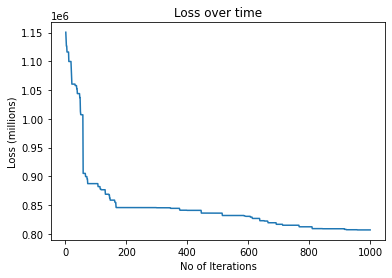

Loss: 806798.3799999994


In [72]:
xpoints = np.array(numIterations)
ypoints = np.array(lossAtIteration)
plt.plot(xpoints, ypoints)
plt.title("Loss over time")
plt.xlabel("No of Iterations")
plt.ylabel("Loss (millions)")
plt.show()
print("Loss:", cost)